Gender Voice Recognization System

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Load the data

In [ ]:
data = pd.read_csv('/content/voice.csv')
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [ ]:
data.label.unique()

array(['male', 'female'], dtype=object)

Checking Null Values

In [ ]:
data.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = data.iloc[:, -1]
y = label_encoder.fit_transform(y)
y

array([1, 1, 1, ..., 0, 0, 0])

Normalization

In [ ]:
data_x = data.drop(["label"], axis=1)
X = (data_x-np.min(data_x)) / (np.max(data_x)-np.min(data_x)).values
print(X)

      meanfreq        sd    median       Q25       Q75       IQR      skew  \
0     0.096419  0.473409  0.084125  0.060063  0.204956  0.254828  0.367853   
1     0.125828  0.505075  0.116900  0.077635  0.215683  0.246961  0.644279   
2     0.179222  0.675536  0.102873  0.034284  0.385912  0.457148  0.885255   
3     0.528261  0.554611  0.587559  0.389906  0.715802  0.407358  0.031549   
4     0.452195  0.627209  0.454272  0.317627  0.707515  0.474474  0.027742   
...        ...       ...       ...       ...       ...       ...       ...   
3163  0.436911  0.684871  0.570361  0.198513  0.686256  0.577704  0.046854   
3164  0.362946  0.731172  0.262871  0.171937  0.702595  0.621185  0.015961   
3165  0.484949  0.799042  0.690337  0.134329  0.786967  0.742124  0.050161   
3166  0.492516  0.745692  0.695311  0.175136  0.767804  0.681107  0.041908   
3167  0.595700  0.768964  0.687590  0.282629  0.901780  0.699289  0.045203   

          kurt    sp.ent       sfm      mode  centroid   meanfu

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


train-test split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state=9)
print("x_train  -  ",x_train.shape)
print("x_test   -  ",x_test.shape)
print("y_train  -  ",y_train.shape)
print("y_test   -  ",y_test.shape)

x_train  -   (2534, 20)
x_test   -   (634, 20)
y_train  -   (2534,)
y_test   -   (634,)


As we choosen test size of 20%, our test data consists of 634 observations and the remaining 2.534 observations are training data. Now we will try different classification methods to reach the highest accuracy score


# XGBoost with hyperparameter tuning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

rf_classifier = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search_rf.fit(x_train, y_train)
print("Best Hyperparameters:", grid_search_rf.best_params_)

best_rf = grid_search_rf.best_estimator_
print("Test score with Random Forest (tuned):", best_rf.score(x_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best Hyperparameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Test score with Random Forest (tuned): 0.9842271293375394


In [ ]:
best_rf = RandomForestClassifier(
    max_depth=10,
    max_features='auto',
    min_samples_leaf=2,
    min_samples_split=5,
    n_estimators=200,
    random_state=9
)

# Fit the model with the training data
best_rf.fit(x_train, y_train)

# Print the test score with the best model
print("Test score with Random Forest (tuned):", best_rf.score(x_test, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Test score with Random Forest (tuned): 0.9810725552050473


# Naive-Bayes Classification with hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

nb = GaussianNB()
grid_search_nb = GridSearchCV(estimator=nb, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search_nb.fit(x_train, y_train)
print("Best Hyperparameters:", grid_search_nb.best_params_)
best_nb = grid_search_nb.best_estimator_
print("Test score with Naive Bayes (tuned):", best_nb.score(x_test, y_test))

Best Hyperparameters: {'var_smoothing': 1e-09}
Test score with Naive Bayes (tuned): 0.8943217665615142


In [ ]:
from sklearn.naive_bayes import GaussianNB
best_nb = GaussianNB(var_smoothing=1e-9)
best_nb.fit(x_train, y_train)
print("Test score with Naive Bayes (tuned):", best_nb.score(x_test, y_test))

Test score with Naive Bayes (tuned): 0.8943217665615142


# Support Vector Machine Classification (SVM) with hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

svm = SVC(random_state=1)
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search_svm.fit(x_train, y_train)
print("Best Hyperparameters:", grid_search_svm.best_params_)
best_svm = grid_search_svm.best_estimator_
print("Test score with SVM (tuned):", best_svm.score(x_test, y_test))

Best Hyperparameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Test score with SVM (tuned): 0.9826498422712934


In [ ]:
best_svm = SVC(
    C=10,
    gamma=1,
    kernel='rbf',
    random_state=9
)
best_svm.fit(x_train, y_train)
print("Test score with SVM (tuned):", best_svm.score(x_test, y_test))

Test score with SVM (tuned): 0.9826498422712934


# K-NEAREST NEIGHBOURS CLASSIFICATION (KNN) with hyperparameter tunning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9]
}

knn = KNeighborsClassifier()
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search_knn.fit(x_train, y_train)
print("Best Hyperparameters:", grid_search_knn.best_params_)
best_knn = grid_search_knn.best_estimator_
print("Test score with KNN (tuned):", best_knn.score(x_test, y_test))

Best Hyperparameters: {'n_neighbors': 3}
Test score with KNN (tuned): 0.973186119873817


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
print("With KNN (k=3) accuracy is: ", knn.score(x_test,y_test))

With KNN (k=3) accuracy is:  0.973186119873817


We used 4 seperate techniques for classification. We got the highest test accuracy with SVM (98%) and the lowest with Naive-Bayes(89%).


# Ensemble Learning

In [ ]:
from sklearn.ensemble import VotingClassifier

clf1 = best_rf
clf2 = best_nb
clf3 = best_svm
clf4 = knn

eclf = VotingClassifier(
       estimators=[('rf', clf1), ('nb', clf2), ('svm', clf3),('knn', clf4)],
       voting='hard')

eclf.fit(x_train, y_train)
print("Ensemble Learning accuracy: ", eclf.score(x_test,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Ensemble Learning accuracy:  0.9826498422712934


<function matplotlib.pyplot.show(close=None, block=None)>

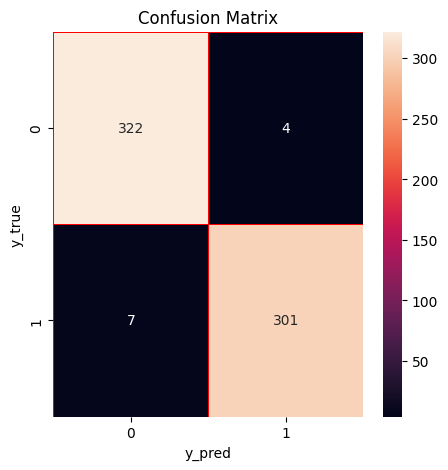

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred = eclf.predict(x_test)
cm = confusion_matrix(y_pred=pred, y_true=y_test)
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5, linecolor="red",fmt=".0f",ax=ax)
plt.title("Confusion Matrix")
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show

# CONCLUSION

# By employing the Ensemble Learning approach, we were able to integrate four separate models and achieve a little higher accuracy of 98%. In the upcoming iteration, we will employ grid search to determine the optimal model parameters and employ cross-validation to approximate the model's projected overall performance when applied to prediction tasks using non-training data.